In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Flatten
x_train = np.loadtxt("input.csv", delimiter=',')
y_train = np.loadtxt("labels.csv", delimiter=',')
x_test = np.loadtxt("input_test.csv", delimiter=',')
y_test = np.loadtxt("labels_test.csv", delimiter=',')
print(x_train.shape)

(2000, 30000)


In [2]:

import random
x_train = x_train.reshape(len(x_train), 100, 100, 3);
x_test = x_test.reshape(len(x_test), 100, 100, 3);
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
x_train = x_train / 255.0
x_test = x_test / 255.0
n = len(x_train)
for i in range(n):
    x = random.randint(0, n) 
    y = random.randint(0, n) 
    if x == 2000: x -= 1
    if y == 2000: y -= 1
    x_train[x] , x_train[y] = x_train[y] , x_train[x]
    y_train[x] , y_train[y] = y_train[y] , y_train[x]

print(x_train.shape)
print(y_train.shape)


(2000, 100, 100, 3)
(2000, 1)


In [3]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


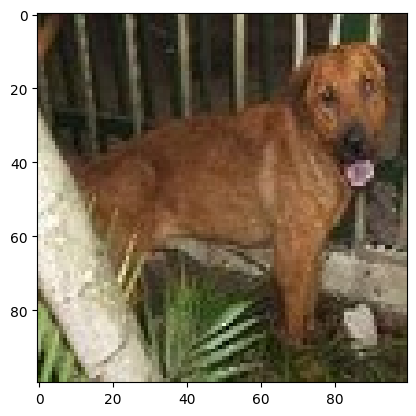

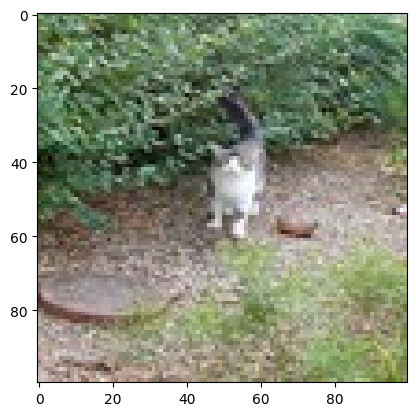

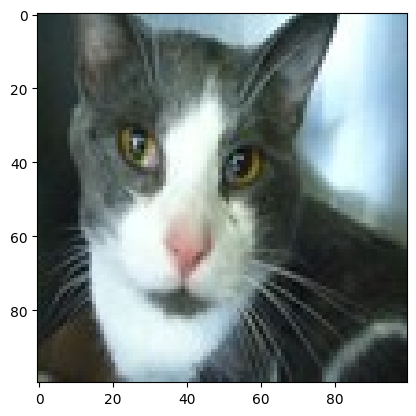

In [4]:
for i in range(3):
    plt.imshow(x_train[i])
    plt.show()

In [10]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()

# VGG16 Model
model.add(base_model)

# new layers
model.add(Conv2D(6, (3, 3), activation='relu'))
model.add(MaxPooling2D((1, 1))) 
model.add(MaxPooling2D((1, 1)))  

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 6)           27654     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 1, 6)           0         
 g2D)                                                            
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 6)           0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [11]:
model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
63/63 [==============================] - 29s 448ms/step - loss: 0.4469 - accuracy: 0.8055
Epoch 2/20
63/63 [==============================] - 27s 431ms/step - loss: 0.2203 - accuracy: 0.9155
Epoch 3/20
63/63 [==============================] - 29s 467ms/step - loss: 0.1425 - accuracy: 0.9480
Epoch 4/20
63/63 [==============================] - 27s 433ms/step - loss: 0.0889 - accuracy: 0.9790
Epoch 5/20
63/63 [==============================] - 27s 430ms/step - loss: 0.0643 - accuracy: 0.9860
Epoch 6/20
63/63 [==============================] - 27s 431ms/step - loss: 0.0428 - accuracy: 0.9930
Epoch 7/20
63/63 [==============================] - 27s 436ms/step - loss: 0.0289 - accuracy: 0.9975
Epoch 8/20
63/63 [==============================] - 27s 431ms/step - loss: 0.0244 - accuracy: 0.9965
Epoch 9/20
63/63 [==============================] - 27s 431ms/step - loss: 0.0208 - accuracy: 0.9980
Epoch 10/20
63/63 [==============================] - 27s 431ms/step - loss: 0.0121 - accura

13/13 [==============================] - 5s 404ms/step
Confusion Matrix :
 [[198  22]
 [ 28 152]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       226
         1.0       0.84      0.87      0.86       174

    accuracy                           0.88       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.88      0.88      0.88       400

dog


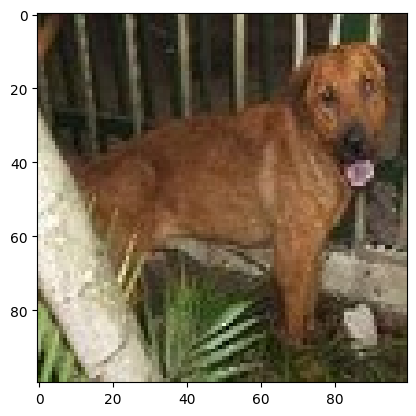

cat


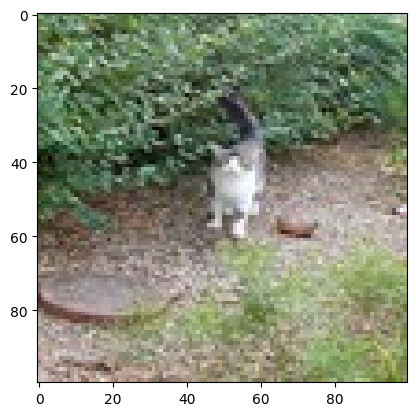

cat


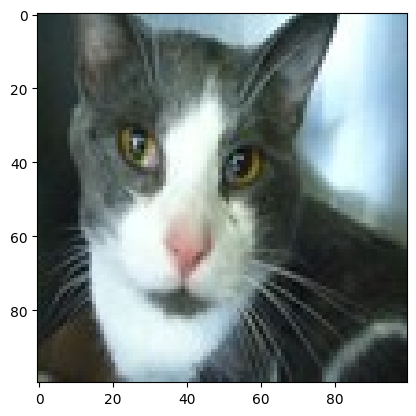

cat


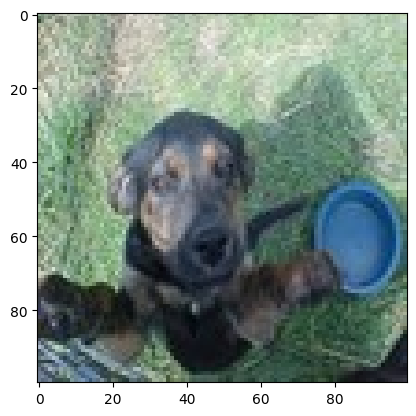

cat


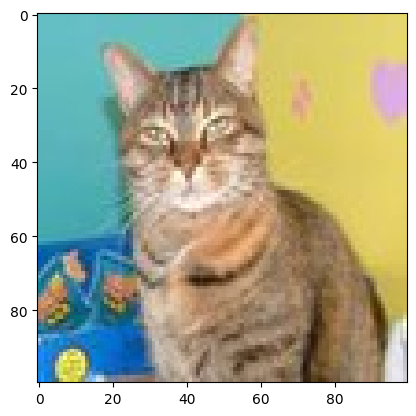

In [12]:
m = len(y_test)
for i in range(m): # eandom shuffle
    x = random.randint(0, m) 
    y = random.randint(0, m) 
    if x == 400: x -= 1
    if y == 400: y -= 1
    x_test[x] , x_test[y] = x_test[y] , x_test[x]
    y_test[x] , y_test[y] = y_test[y] , y_test[x]

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pred = model.predict(x_test)

for i in range(400):
    if pred[i] >= 0.5: pred[i] = 1
    else: pred[i] = 0
        
# model.evaluate(x_test, y_test)
print("Confusion Matrix :\n" , (confusion_matrix(pred, y_test)))
print(classification_report(y_test, pred))
for i in range(5):
    if(i == 0):
        print("dog")
    else:
        print("cat")
    plt.imshow(x_train[i])
    plt.show()
    

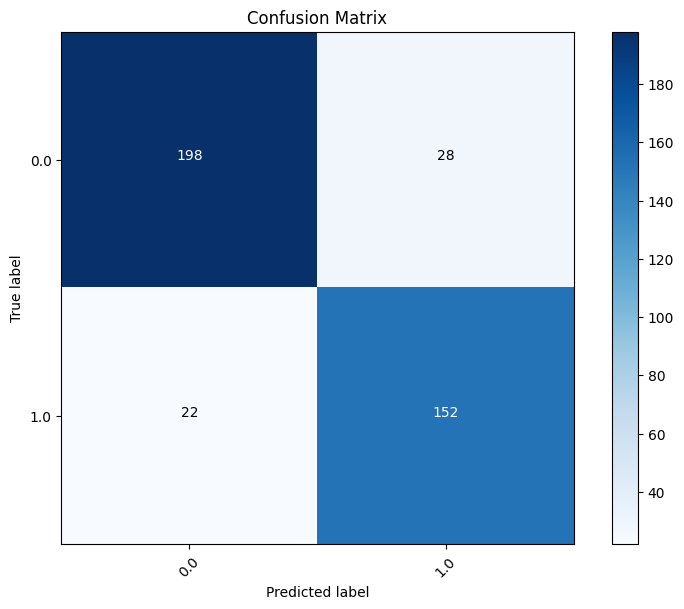

In [13]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()


classes = np.unique(np.concatenate((y_test, pred)))
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()